# Dataset Introduction
Dataset Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

This project uses the **Telco Customer Churn** dataset from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). The data was originally by **IBM** and has already been cleaned and labeled.

This project aims to:
- <u>**perform**</u> Exploratory Data Analysis for the dataset.
- <u>**apply**</u> data Preprocessing and Feature Engineering preparing the dataset for model training.
- <u>**build a machine learning model**</u> able to `predict customer churn` using their usage patterns, account information and demographics in order to help businesses take proactive retention measures.

# Import Dependencies

We import all necessary libraries for data manipulation, visualization and analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

We import the dataset from Google Drive. We simply connect our colab file to Google Drive by clicking the Drive icon on the navigation bar at the left or by running the code: <br>
*`from google.colab import drive`* <br>
*`drive.mount('/content/drive')`*

In [ ]:
dataset = ('/content/drive/MyDrive/Machine Learning Datasets/Customer Churn Prediction/Telco-Customer-Churn.csv')
dataset = pd.read_csv(dataset)
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Overview
The dataset contains information about **telecommunication company customers** and whether they **churned** (left the company) in the last month.

**Target Variable**: `Churn` (`Yes` = Customer left, `No` = customer stayed)

---

##Column Categories

### 1. **Target Variable**
- **`Churn`** — Indicates if the customer left within the last month.

### 2. **Services Signed Up**
- **Phone service:** `PhoneService`, `MultipleLines`
- **Internet services:** `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`

### 3. **Customer Account Information**
- **Tenure:** `tenure` — how long they’ve been a customer (months)
- **Contract type:** `Contract`
- **Billing:** `PaperlessBilling`
- **Payment method:** `PaymentMethod`
- **Charges:** `MonthlyCharges`, `TotalCharges`

### 4. **Demographic Information**
- **Gender:** `gender`
- **Family status:** `Partner`, `Dependents`


In [ ]:
print(f"The dataset has {dataset.shape[0]:,} rows and {dataset.shape[1]:,} columns.")
dataset.head(5)

The dataset has 7,043 rows and 21 columns.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Types and Missing Values
Inspecting column data types and identifying missing values for cleaning and preprocessing.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Class Distribution

We check for class imbalance. If class count differ significantly a possible use case scenario for SMOTE might be needed later on to normalize the class distribution.

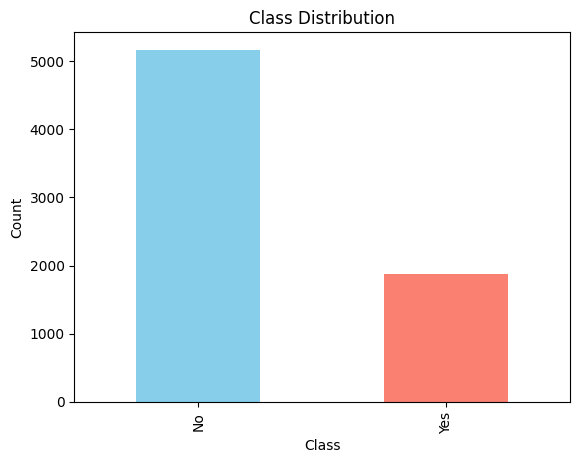

In [ ]:
dataset['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Statistical Summary
We use the .describe() method to obtain a statistical summary of the numerical features. This includes measures such as mean, standard deviation, and quartiles, which help assess the central tendency and spread of data.

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Unique Values for Categorical Features
Checking different categorical values in each columns. It helps in planning encoding strategies later on in the process.

In [ ]:
cat_cols = dataset.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"{col}: {dataset[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']



**Observation**: We can observe that on the given list of Categorical columns `TotalCharges` was included. This could mean that the values were stored as an object string instead of a numeric type. In order to solve this we simply convert the whole column into numeric type.

### Converting `TotalCharges` into numeric type
We simply convert the whole column by using *`pd.to_numeric`*.

In [ ]:
print("Initial column type:", dataset['TotalCharges'].dtypes)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
print("Total NaN values:", dataset['TotalCharges'].isna().sum())

Initial column type: object
Total NaN values: 11


In [ ]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(0)
print("Final column type:", dataset['TotalCharges'].dtypes)
print("Total NaN values:", dataset['TotalCharges'].isna().sum())

Final column type: float64
Total NaN values: 0


# Exploratory Data Analysis


## Numerical Feature Distribution

Visualizing numerical features such as tenure, MonthlyCharges, and TotalCharges helps us understand:
- the range and spread of each variable.
- presence of outliers.
- General customer spending and tenure patterns.

This step is useful for spotting potential skewness and deciding whether transformations (e.g., log-scaling) might be needed.


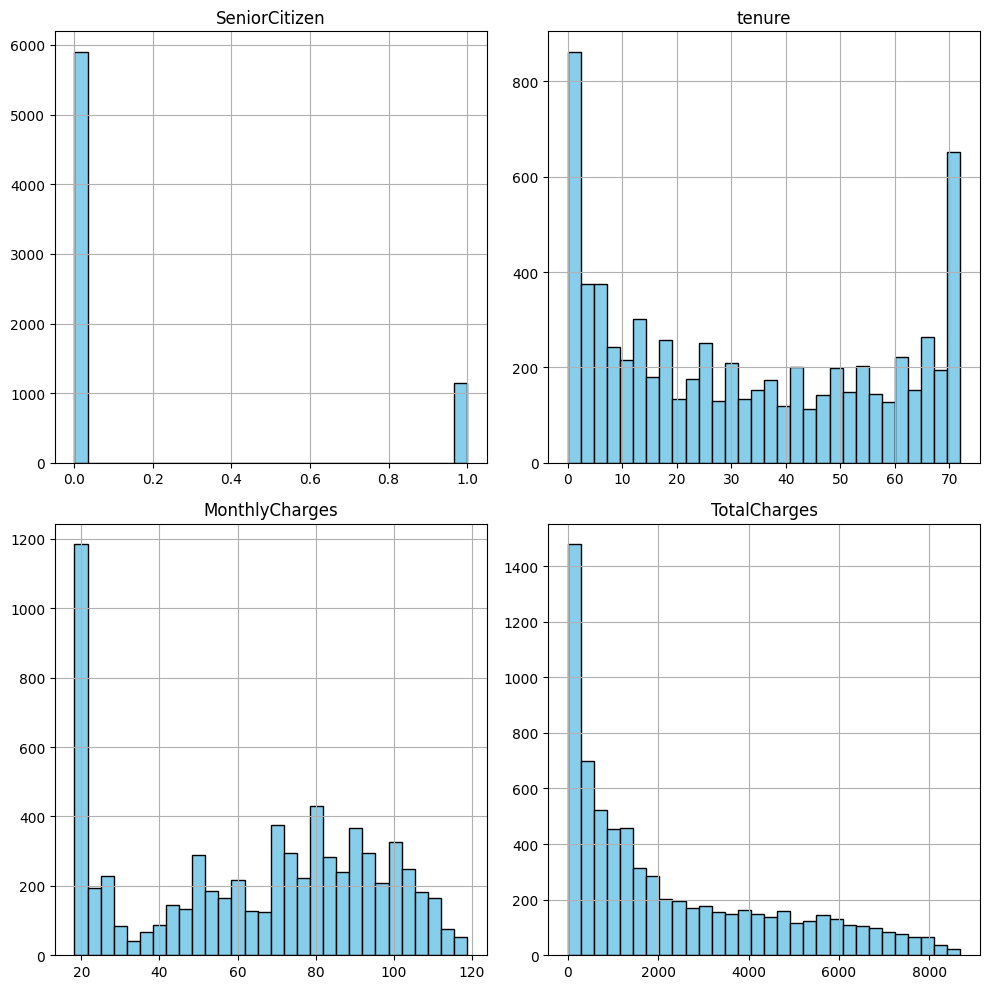

In [ ]:
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

dataset[num_cols].hist(bins=30, figsize=(10, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## Categorical Feature Distributions
Examine the distribution of categorical features such as `Contract`, `InternetService`, and `PaymentMethod`. This will show us:
- the most common customer service type
- whether any categories are rate and might need combining or special handling.


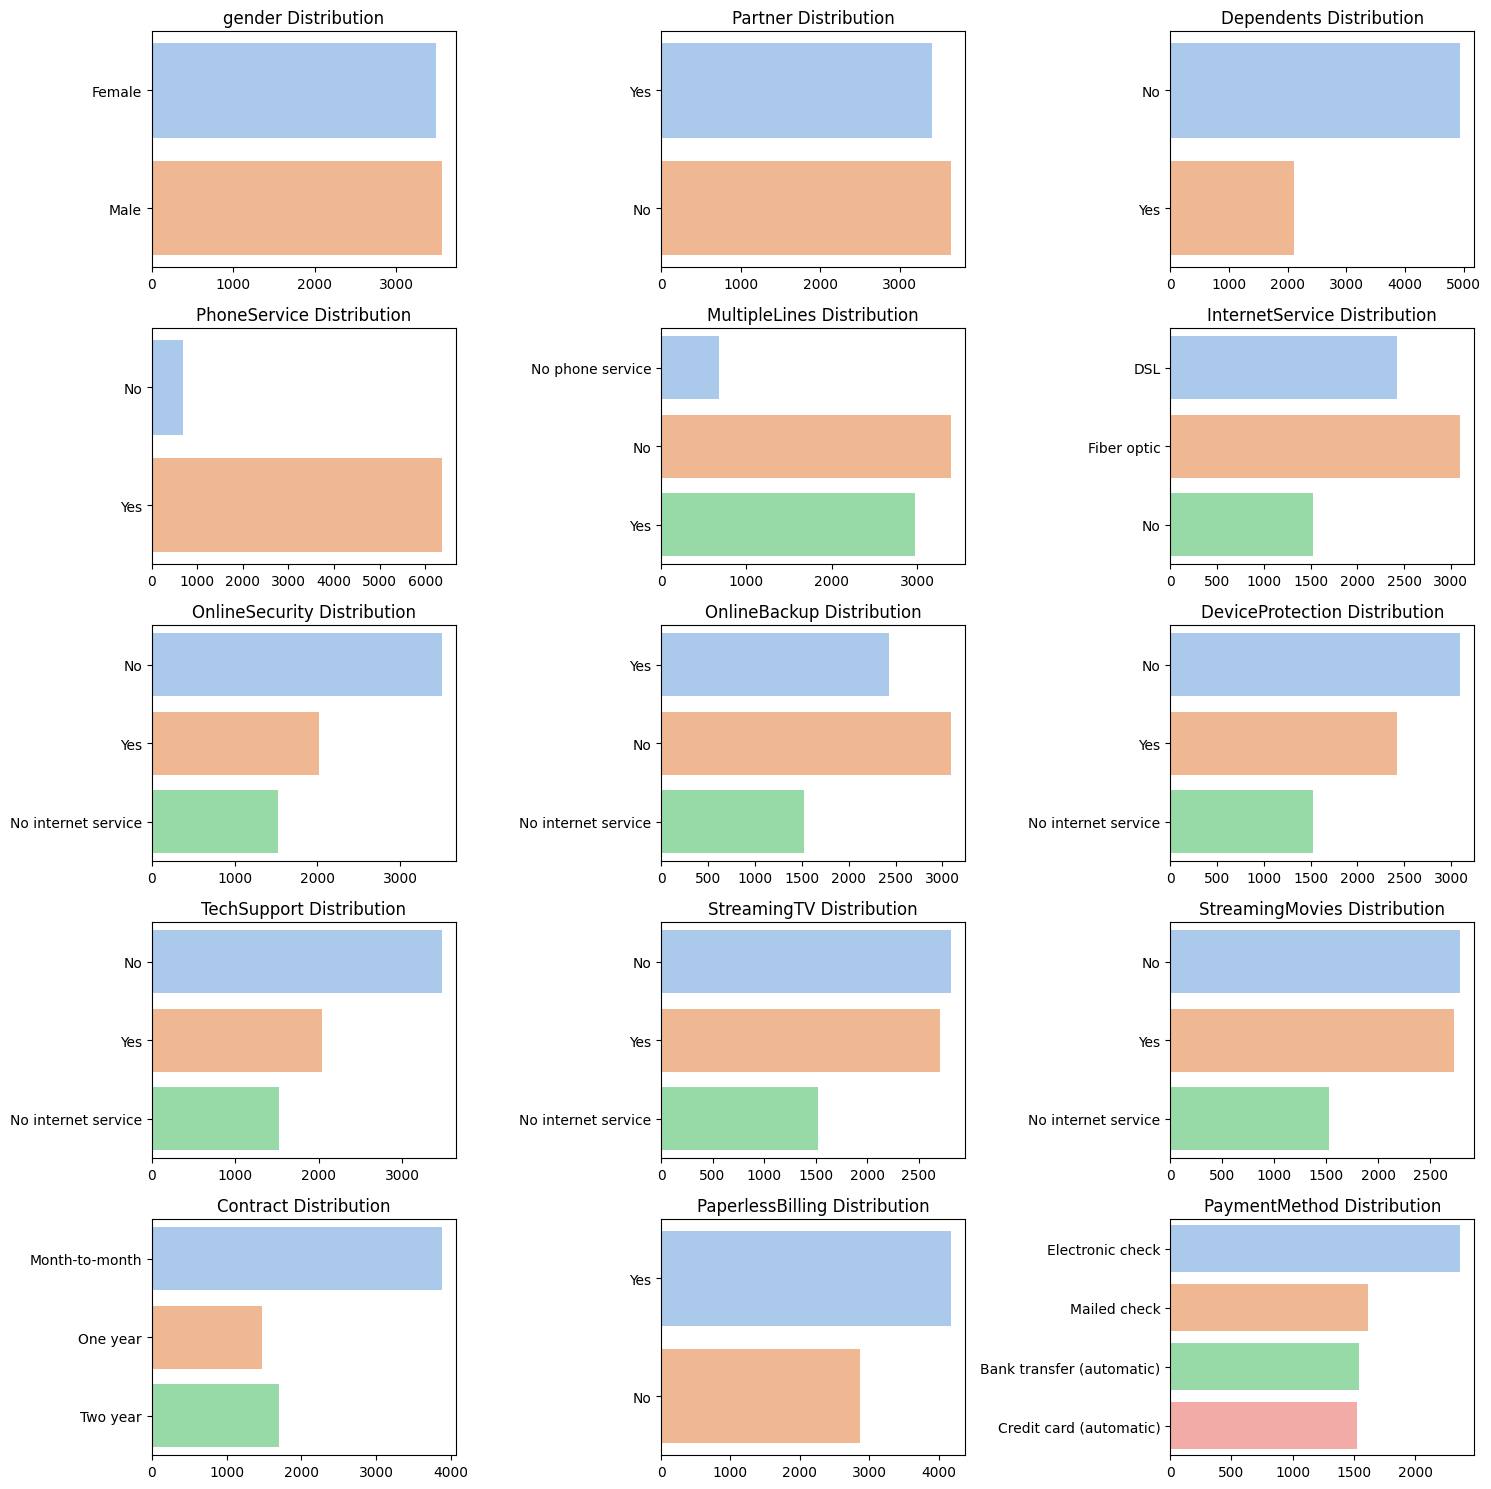

In [ ]:
cat_cols = dataset.select_dtypes(include=[object]).columns.drop(['Churn', 'customerID'])

fig, axes = plt.subplots(nrows=(len(cat_cols) + 2) // 3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=dataset, ax=axes[i], palette='pastel', hue=col, legend=False)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Target Variable vs Feature correlation
We now explore how each feature relates to churn.  
- For categorical variables: Compare category frequencies between churned and non-churned customers.  
- For numerical variables: Compare value distributions using boxplots.

This helps identify key churn drivers, such as whether month-to-month contracts or high monthly charges are linked to higher churn rates.

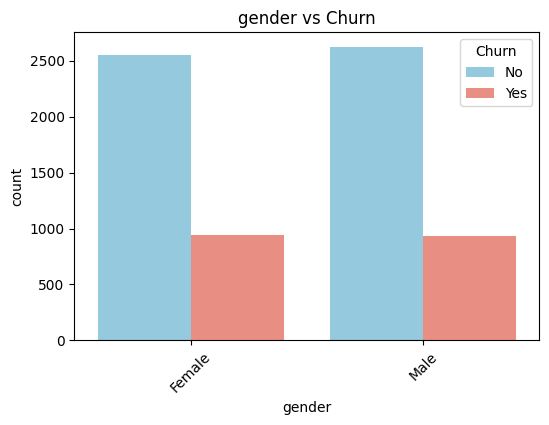

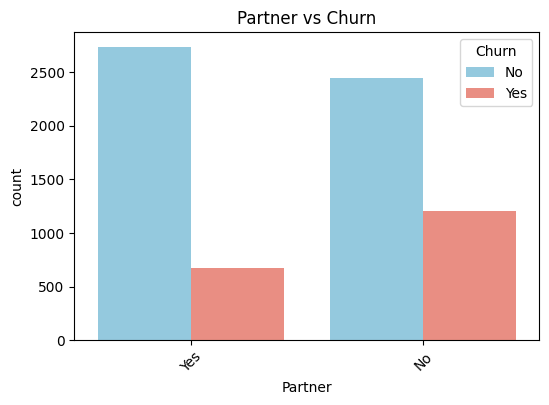

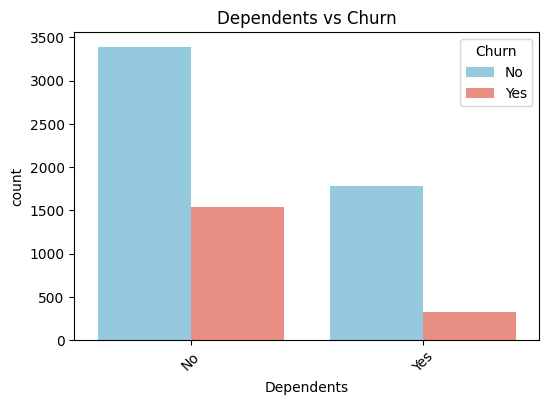

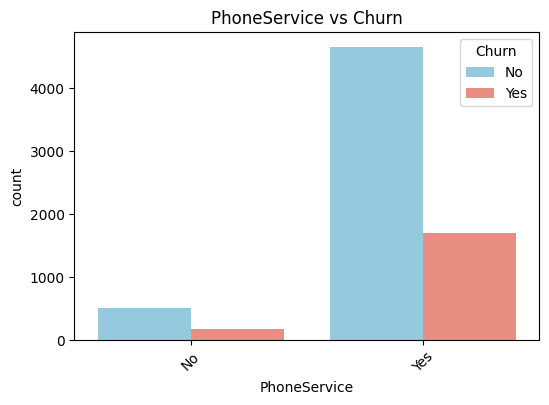

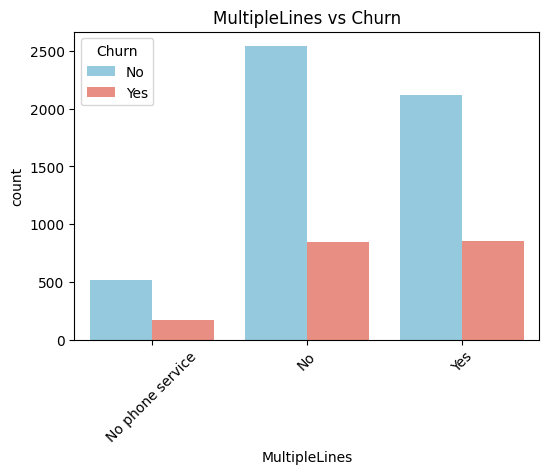

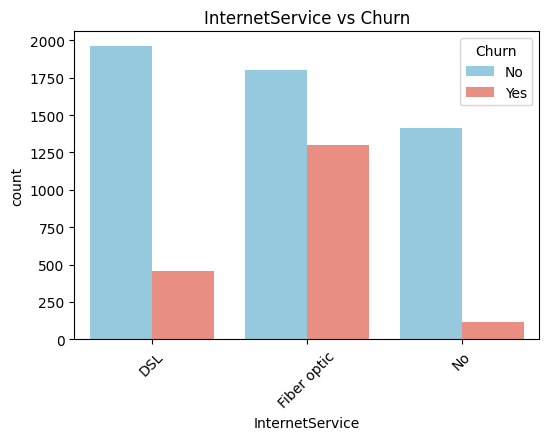

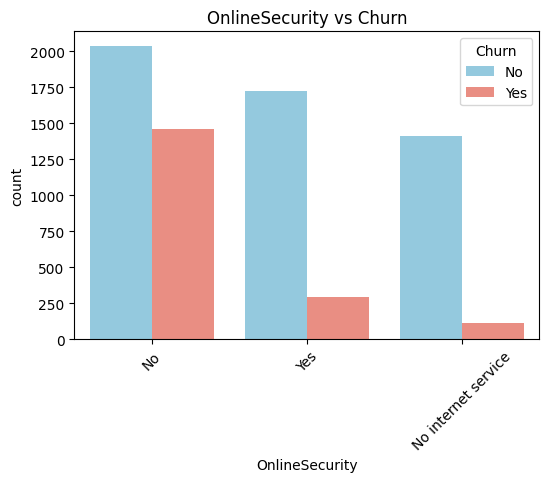

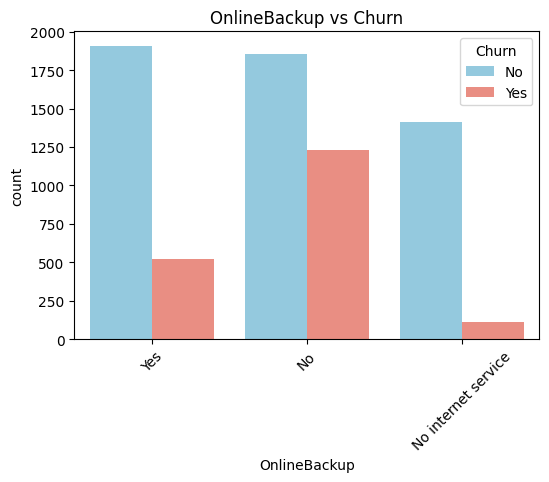

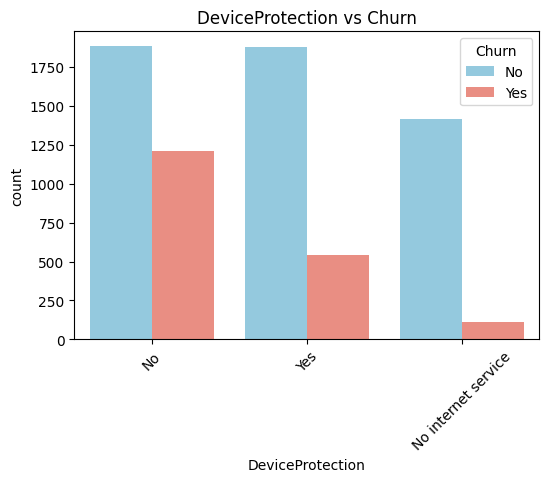

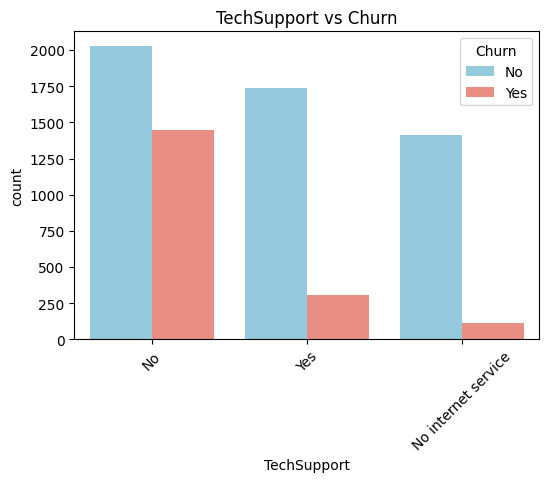

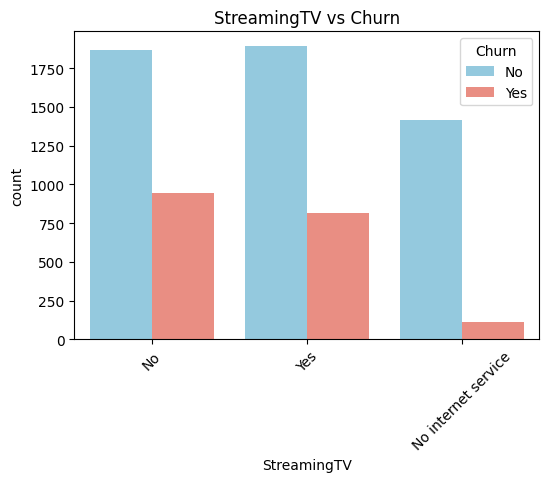

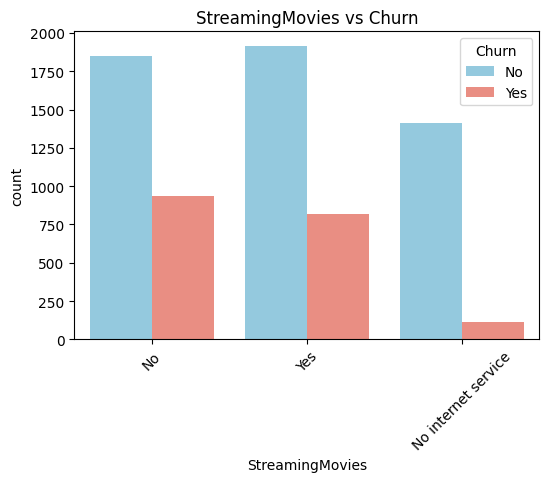

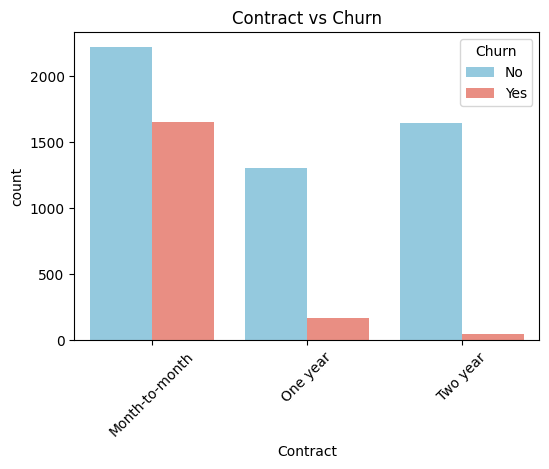

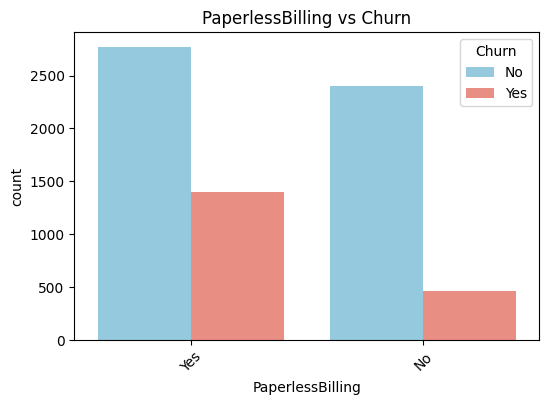

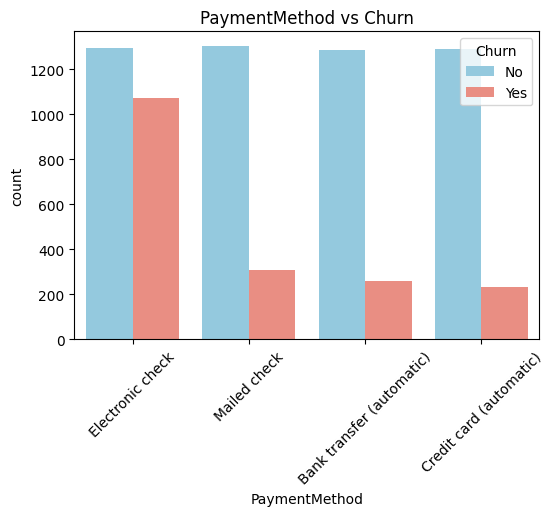

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=dataset, palette=['skyblue','salmon'])
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

## Correlation Analysis
We now check the relationship between numerical variable using correlation heatmap. This helps:
- Identify redundant features (high correlation, rule of thumb: `|correlation| > 0.85` consider dropping one feature).
- Spot variables with potential predictive power for churn.

For example, `MonthlyCharges` and `TotalCharges` might be strongly correlated, meaning we should be cautious about multicollinearity.


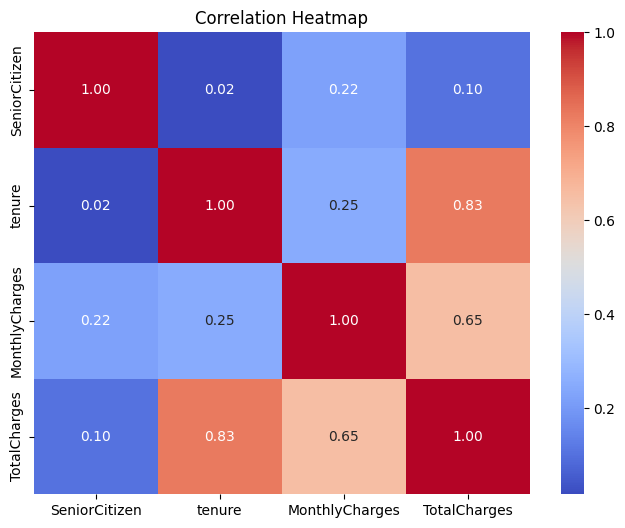

In [ ]:
plt.figure(figsize=(8,6))
corr = dataset[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Data Processing

We know proceed to **Data Processing** ensuring the data is clean, numeric where necessary and ready for ML models.


In [ ]:
dataset = dataset.drop('customerID', axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encoding Categorical Variables

Machine learning models require numerical input, so categorical features must be transformed into numeric format.  
In this dataset, we have three types of categorical features:

1. **Binary (Yes/No)** — Converted directly to `0` and `1`.
2. **Ordinal (ordered)** — Categories have a natural order, encoded using **Ordinal Encoding**.
3. **Nominal (unordered)** — No inherent order, encoded using **One-Hot Encoding** to create separate binary columns for each category.

This ensures the data is in a suitable format for all models, avoids misinterpretation of category order, and preserves model flexibility.


Encoding Binary Yes/No Columns

In [ ]:
binary_map = {'Yes': 1, 'No': 0}
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    dataset[col] = dataset[col].map(binary_map)

In [ ]:
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0})

Encoding Ordinal Columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['Contract']
ordinal_order = [['Month-to-month', 'One year', 'Two year']]
dataset[ordinal_cols] = OrdinalEncoder(categories=ordinal_order).fit_transform(dataset[ordinal_cols])

One-hot encoding Nominal Columns

In [ ]:
nominal_cols = ['InternetService', 'PaymentMethod', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']

dataset = pd.get_dummies(dataset, columns=nominal_cols, drop_first=True)

In [ ]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,0.0,1,29.85,29.85,...,False,True,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,1.0,0,56.95,1889.50,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0,2,1,0.0,1,53.85,108.15,...,False,True,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,1.0,0,42.30,1840.75,...,False,False,False,True,False,True,False,False,False,False
4,0,0,0,0,2,1,0.0,1,70.70,151.65,...,False,False,False,False,False,False,False,False,False,False


## Checking Numerical Feature Distributions

Before proceeding and deciding on a scaling method, it’s important to check the distribution of numerical features.  
This helps us see:
- If features are **roughly normally distributed** → `StandardScaler` is a good choice.
- If features are **skewed** → we may need `MinMaxScaler` or transformations (e.g., log).
- If features have **extreme outliers** → `RobustScaler` may be better.

We'll plot histograms for each numeric feature to visualize their distributions.


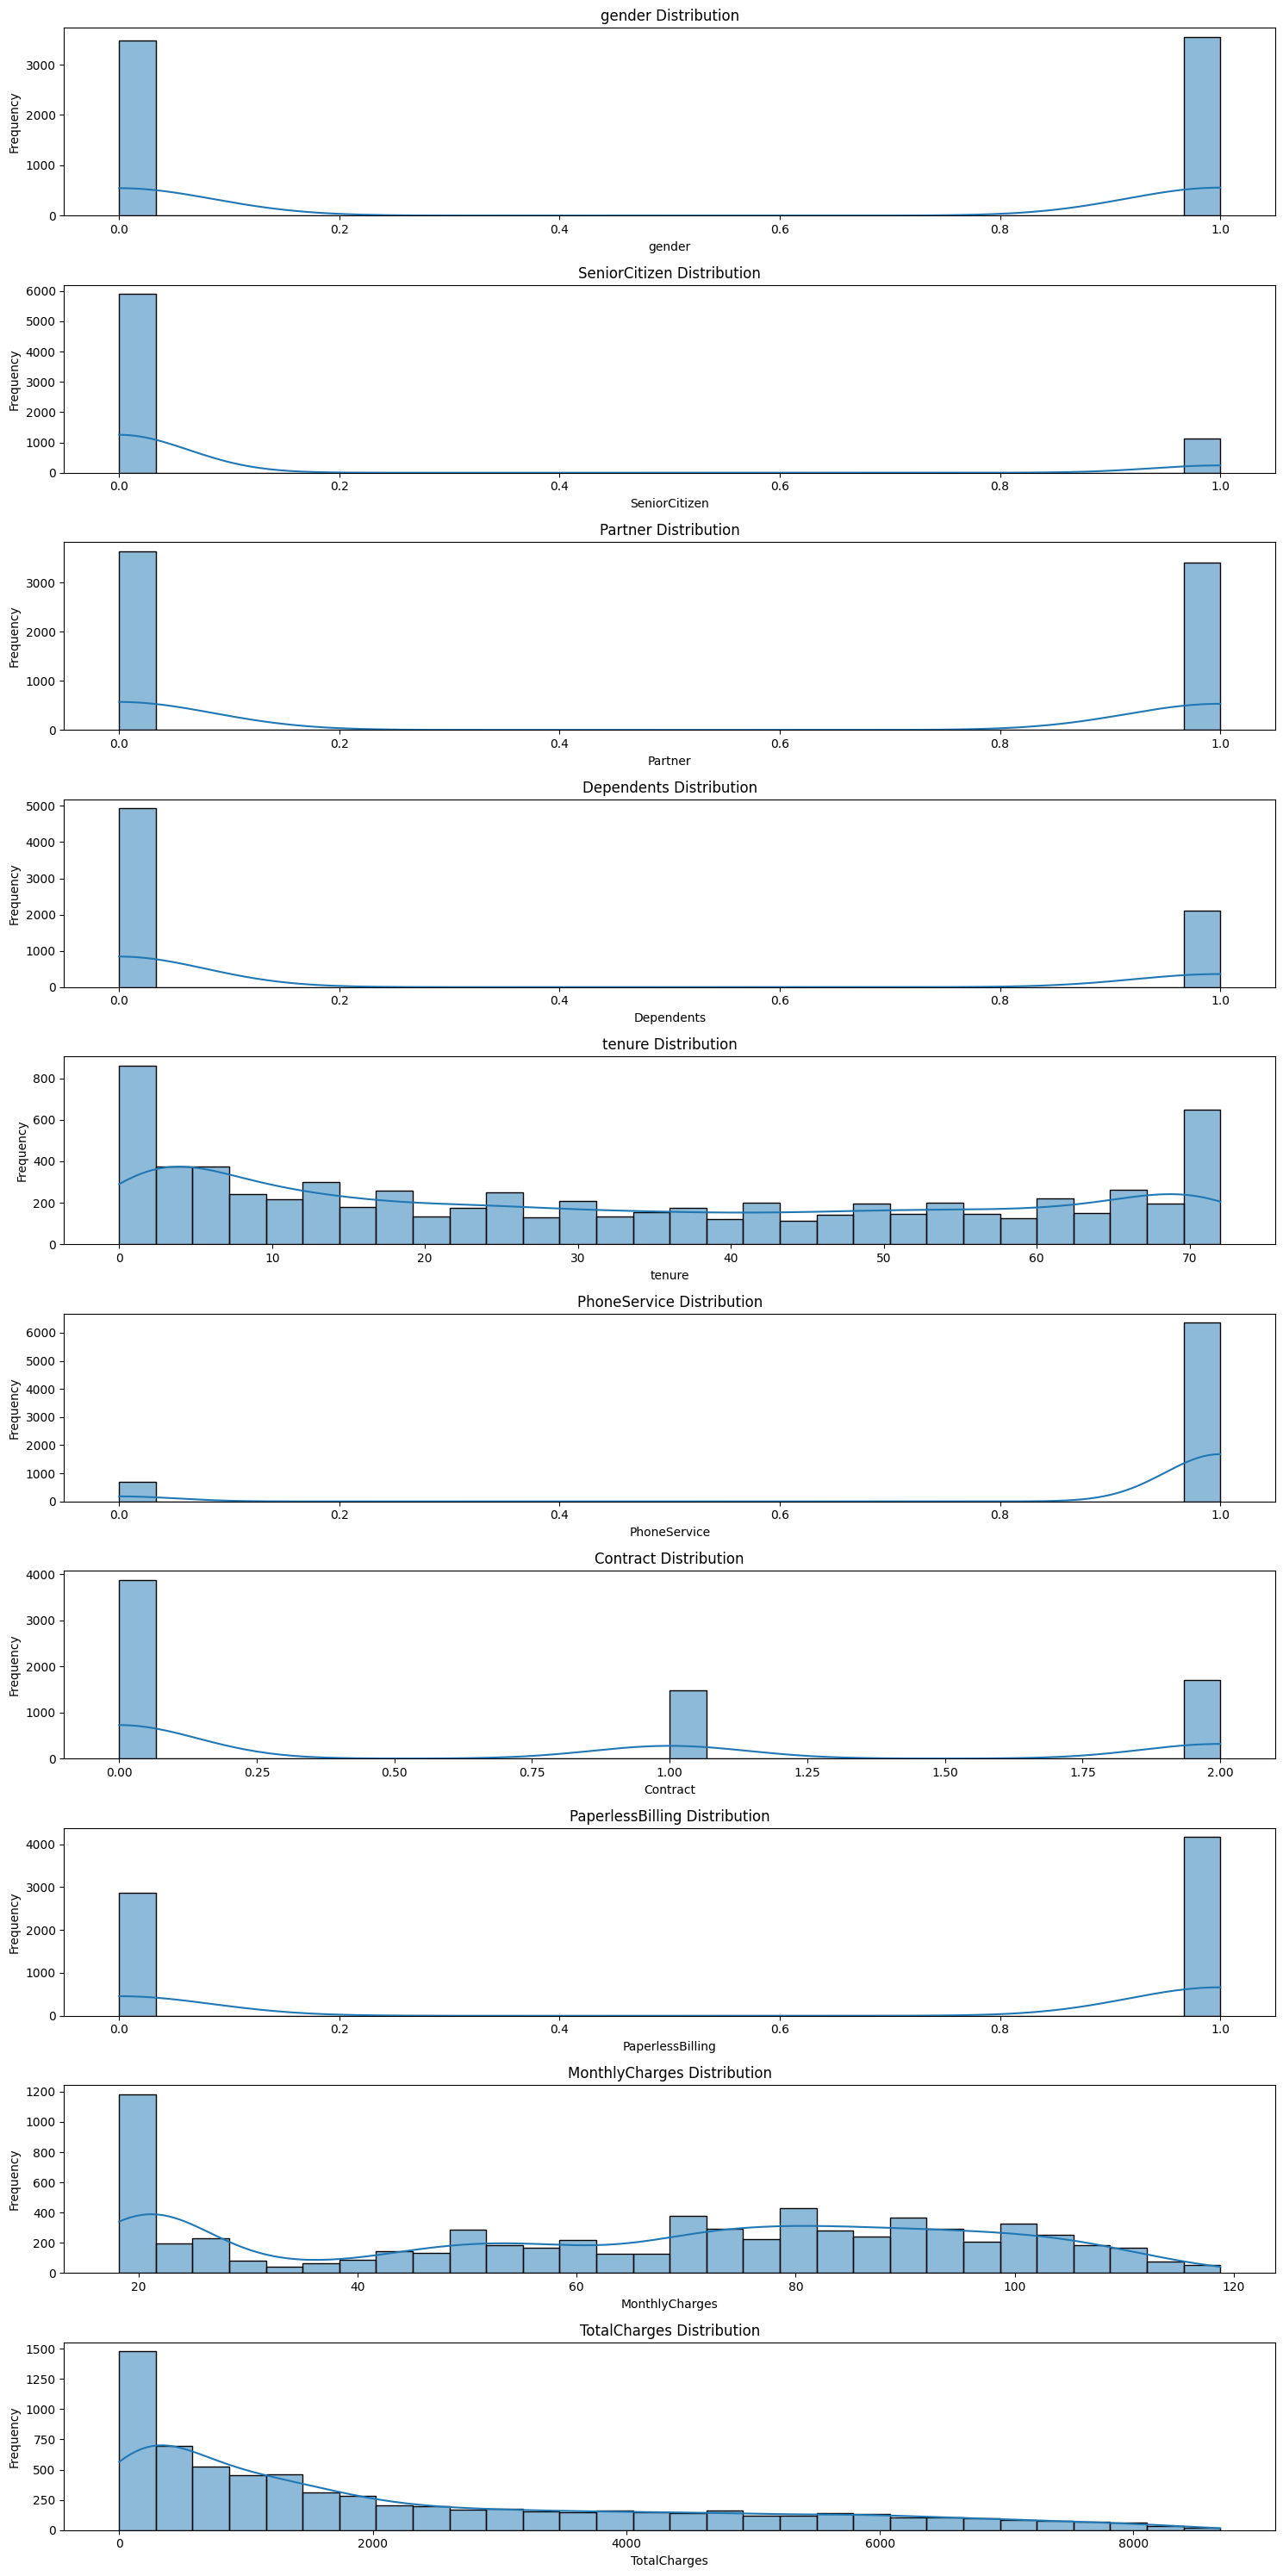

In [ ]:
numeric_features = dataset.select_dtypes(include=['int64', 'float64']).columns.drop(['Churn'])

plt.figure(figsize=(15, len(numeric_features) * 3))

for i, col in enumerate(numeric_features, 1):
  plt.subplot(len(numeric_features), 1, i)
  sns.histplot(dataset[col], kde=True, bins=30)
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Scaling
**Why we scale features:**  
Many machine learning algorithms (such as Logistic Regression, KNN, and SVM) are sensitive to the scale of numerical features.  
If one feature has values in the thousands (e.g., `TotalCharges`) and another in single digits (e.g., `tenure`), the algorithm might incorrectly give more weight to the larger-scale feature — not because it’s more important, but because it has bigger numbers.  

**What scaling does:**  
Scaling transforms all numerical features into a similar range, ensuring each feature contributes equally to the model's learning process.  
Two common methods are:  
- **StandardScaler:** Converts data to have mean = 0 and standard deviation = 1.  
- **MinMaxScaler:** Rescales data to a fixed range, usually 0–1.  

For this project, we will use **StandardScaler** to normalize numerical features before model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

binary_cols = [col for col in dataset.columns if dataset[col].nunique() == 2]
continuous_cols = [col for col in dataset.select_dtypes(include=['float64', 'int64']).columns if col not in binary_cols]

scaler = StandardScaler()
dataset[continuous_cols] = scaler.fit_transform(dataset[continuous_cols])

print("Scaled columns:", continuous_cols)
print("Binary columns left untouched:", binary_cols)

Scaled columns: ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']
Binary columns left untouched: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes']


## Train-Test Split
Before training, the dataset is split into training and testing subsets.
This prevents data leakage and ensures that the model is evaluated on unseen data.

In [ ]:
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Handling Class Imbalance
We observed initially a significant diffence in terms of class values between our target variable. We handle that difference using various techniques and methods to improve the model's ability to detect churners(Minority Class).

On handling class imbalances we could use the following:
- Use class_weight='balanced' in models like Logistic Regression, RandomForest.
- Apply oversampling techniques like SMOTE (Synthetic Minority Oversampling).

In [ ]:
print("Before balancing:")
print(y_train.value_counts())
print("\nProportion:")
print(y_train.value_counts(normalize=True))

Before balancing:
Churn
0    4139
1    1495
Name: count, dtype: int64

Proportion:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())
print("\nProportion:")
print(pd.Series(y_train_res).value_counts(normalize=True))


After SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64

Proportion:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


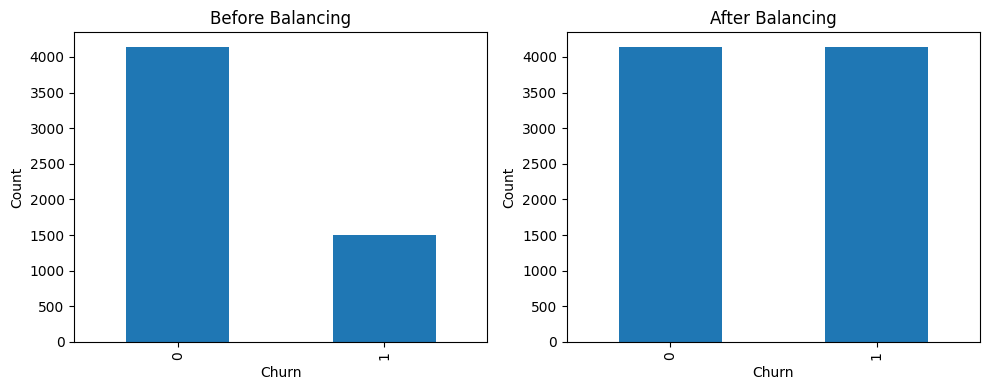

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot(kind='bar', ax=axes[0], title='Before Balancing')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

pd.Series(y_train_res).value_counts().plot(kind='bar', ax=axes[1], title='After Balancing')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Model Training

## Baseline Model — Logistic Regression

For the baseline, I chose Logistic Regression because:
- The target variable ("Churn") is binary (Yes/No)
- Logistic Regression is fast, interpretable, and works well as a benchmark
- It outputs probabilities, allowing for threshold tuning later

The results below will serve as a performance reference before trying more complex models like Random Forest or XGBoost.


Accuracy: 0.7331440738112136
ROC-AUC: 0.8213826241959234

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1035
           1       0.50      0.71      0.58       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.75      1409



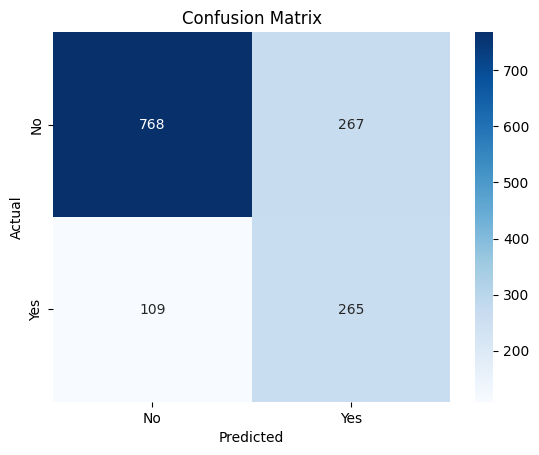

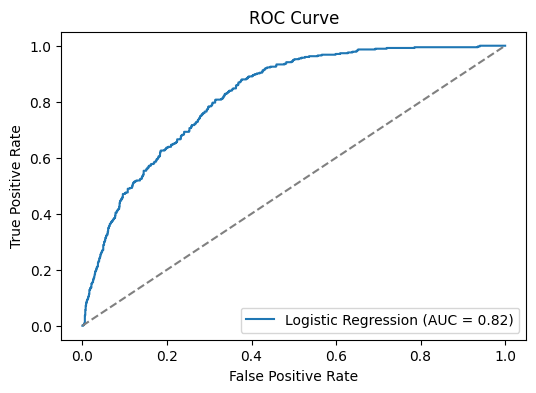

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Observation**:
- **Accuracy = 73%**: Means the model correctly predicts churn/non-churn 73% of the time.
- Not bad for a first pass, but accuracy can be misleading in imbalanced datasets.
- **ROC-AUC = 0.821**: Quite good for a baseline, means the model can distinguish between churners and non-churners 82% of the time across all the thresholds.
- Anything above 0.8 is generally considered strong for initial performance.

## Model Benchmarking

To compare different algorithms, I trained:
1. Logistic Regression (baseline)
2. Random Forest
3. XGBoost

Metrics used:
- **Accuracy**: Percentage of correct predictions
- **ROC–AUC**: Measures the ability of the model to distinguish between churn and non-churn across all classification thresholds

The results table and bar plot below make it easier to visually compare model performance.


=== Logistic Regression ===
Accuracy: 0.7331440738112136
ROC-AUC: 0.8213826241959234
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1035
           1       0.50      0.71      0.58       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.75      1409



=== Random Forest ===
Accuracy: 0.7665010645848119
ROC-AUC: 0.8244542612829057
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409





/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:15:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.7537260468417317
ROC-AUC: 0.8180578160117802
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1035
           1       0.53      0.66      0.59       374

    accuracy                           0.75      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.75      0.76      1409



                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.733144  0.821383
1        Random Forest  0.766501  0.824454
2              XGBoost  0.753726  0.818058


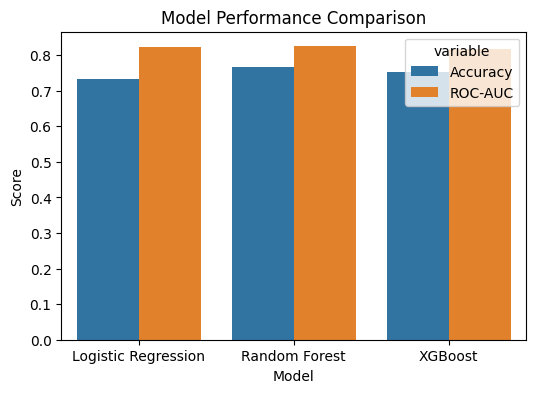

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'ROC-AUC': roc
    })

    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))
    print("\n")

evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42),
               X_train_res, y_train_res, X_test, y_test)

evaluate_model("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42),
               X_train_res, y_train_res, X_test, y_test)

evaluate_model("XGBoost", XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss'),
               X_train_res, y_train_res, X_test, y_test)

results_df = pd.DataFrame(results)

print(results_df)

plt.figure(figsize=(6,4))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

# Model Performance Summary

1. Random Forest had the highest Accuracy **(0.7665)** and ROC–AUC **(0.8245)**, making it the top-performing model for predicting customer churn in this dataset.

2. Logistic Regression performed surprisingly well given its simplicity, with ROC–AUC just 0.003 lower than Random Forest.

3. XGBoost, while often a strong competitor, slightly underperformed compared to the other two — possibly due to the dataset’s relatively small size and the fact that Random Forest handled the feature space effectively without heavy tuning.

Overall, with a small and class imbalanced dataset acquiring above 80% accuracy is acceptable. To further the accuracy certain steps must be taken such as adding more data, using other techniques in model training such as Stacking/Ensembling(combining various models), etc.

**Note**: Although Random Forest had the highest performance, the minimal difference in ROC–AUC between models <u>suggests the dataset may not require complex algorithms to achieve strong results</u>. This also highlights the importance of testing multiple models before deciding on the final deployment candidate.